## BOOK RECOMMENDATION SYSTEM

**setting up the environment**

installing required packages like surprise since they are not available in environment

In [33]:
!pip install --upgrade pip
!pip install surprise

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (19.0.3)


## loading data into a dataframe

In [34]:
import pandas as pd
books=pd.read_csv('books.csv')

In [35]:
ratings=pd.read_csv('ratings.csv')

In [36]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [37]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


## exploring the data

In [38]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [39]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [40]:
ratings.rating.unique()

array([5, 3, 4, 1, 2])

## visualizing the data

In [41]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = ratings['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / ratings.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} book-ratings'.format(ratings.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [42]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

## Data preprocessing

In [43]:
book=books[['book_id','authors','original_title']]

In [44]:
books_data = pd.merge(ratings, book, on='book_id')

In [45]:
ratings.columns

Index(['book_id', 'user_id', 'rating'], dtype='object')

In [46]:
reduced_data=ratings[ratings.rating>4]
reduced_data.shape

(292961, 3)

## applying clustering for recommendations

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
sample =ratings.sample(10000)
kmeans.fit(sample)
predictions=kmeans.predict(sample)
score=silhouette_score(sample,predictions)
score

0.42673926323631023

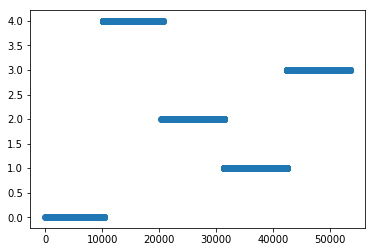

In [48]:
#from itertools import islice,cycle
import matplotlib.pyplot as plt
%matplotlib  inline
import numpy as np
#colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             #'#f781bf', '#a65628', '#984ea3',
                                             #'#999999', '#e41a1c', '#dede00']),
                                      #int(max(predictions) + 1))))
        # add black color for outliers (if any)
#colors = np.append(colors, ["#000000"])
plt.scatter(sample['user_id'][:10000], predictions[:10000])#, color=colors[predictions[:1000]])


from the above scatter plot,it is clear that the data points has been divided based on the user_id sequence

That means users with in a range of user_id will get similar recommendations.But thats not the actual thing.we should recommend the books based on the user interest but no depending on his user_id,which is just a unique identification

so, this model doesnt perform well in recommending suitable books.Therefore we should consider some more optimised model which recommends based on user interests.


**Now we will work with models present in surprise package,which are solely designed for recommendation systems
surprise consists of models like SVD and NMF.**





## splitting the data
 
In order to implement a model in surprise, we have to do the following
* to be able to read the data first create a Reader and define its format. 
* Then we load our data in a Dataset object
* we can split our data for testing and training purposes,But this step is not mandatory.Its just used to apply an evaluation  metric like rmse to know whether model is working fine or not.Else we can train our model on the entire data without applying a metric.

In [49]:
from surprise import Reader, Dataset, SVD, evaluate,accuracy,NMF
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold

reader = Reader(rating_scale=(1,5))


data = Dataset.load_from_df(ratings[ratings.rating>1][['book_id', 'user_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.15)



## Bench Mark Model

Its been implemented using non-negative matrix factoroization.

In [50]:
nmf = NMF()
nmf.fit(trainset)
predictions_nmf = nmf.test(testset)
accuracy.rmse(predictions_nmf, verbose=True)

RMSE: 0.8210


0.82100768646630906

## Optimized model

SVD is an collaborative filtering algorithm which recommends based on matrix factorization.

It is far better than other algorithms both in computational time and power and better gives the results.

**training and testing the model**

first we will train the model on the trainset by creating an object to the SVD class and then calling the method fit by passing trainset as an argument

Then we will test the model using test method against testset and then find out the accuracy using root mean square error metric

In [51]:
svd = SVD()
svd.fit(trainset)
predictions_svd = svd.test(testset)
accuracy.rmse(predictions_svd, verbose=True)

RMSE: 0.7766


0.77663889719691093

here we got an rmse value of 0.7767.It means that the model works fine in determining the user interests with books.

## comparision between NMF and SVD

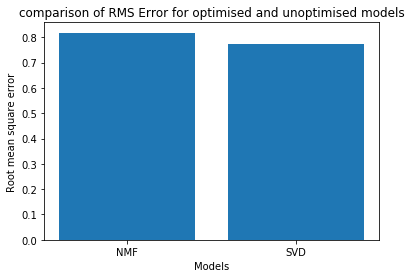

In [52]:
x=['NMF','SVD']
value=[0.8183,0.7754]
plt.bar(x,value)
plt.xlabel('Models')
plt.ylabel('Root mean square error')
plt.title('comparison of RMS Error for optimised and unoptimised models')
plt.show()



## Recommendations of a particular user

So far,we are done with training the model.

Now, Its time to dive into the most exciting part of the project,which is recommending the books of user interest.

The following is the function which takes user_id as a parameter and prints top 10 recommendations of the books

In [57]:
def recommendation(user_id,algo):
    #make a copy of the book details
    user = book.copy()
    #get a list of books already rated by the user 
    already_read = books_data[books_data.user_id== user_id]['book_id'].unique()
    #reset the index of the user data
    user = user.reset_index()
    #now we will remove the books already reviewed by the user in order to make sure that we wont recommend him again
    user = user[~user['book_id'].isin(already_read)]
    #Here we will find the estimation score between each and every book available and the user
    user['Estimate_Score']=user['book_id'].apply(lambda x: algo.predict(user_id, x).est)
    #now we will sort the books in the order of their estimation scores in descending manner 
    user = user.sort_values('Estimate_Score', ascending=False)
    #print top 10 books as recommendation to the user
    print(user[['authors','original_title']].head(10))

In [58]:
books_data[books_data.user_id== 315]

,book_id,user_id,rating,authors,original_title
21497,2915,315,5,Gary Paulsen,The River
51000,5954,315,5,"Hermann Hesse, Ursule Molinaro",Narziß und Goldmund


##  Book recommendations using SVD

In [59]:
recommendation(315,svd)

                                      authors  \
1985                             John Grisham   
3507  Marcel Proust, Simon Vance, Lydia Davis   
2670                             Maeve Binchy   
155                              Emily Giffin   
8703  Leo Tolstoy, Louise Maude, Aylmer Maude   
3790                             Michel Faber   
2740                Roald Dahl, Quentin Blake   
4166                                Garth Nix   
1552                      Laurell K. Hamilton   
156                       Dr. Seuss, לאה נאור   

                                         original_title  
1985                                   The Innocent Man  
3507                              Du côté de chez Swann  
2670                                  Circle of Friends  
155                                  Something Borrowed  
8703                                        Воскресение  
3790                    The Crimson Petal and the White  
2740                   Danny: The Champion of the Worl

##  Book recommendations using NMF

In [60]:
recommendation(315,nmf)

                                                authors  \
6086                                    Agatha Christie   
2507                                      Toni Morrison   
3820                                Neale Donald Walsch   
4458                                       Terry Brooks   
2943                                    Terry Pratchett   
8818  Rainer Maria Rilke, Stephen Mitchell, Robert Hass   
5272                                      Angela Carter   
3637                                 Marilynne Robinson   
6997                       Betty Friedan, Anna Quindlen   
2052                                 Robert Penn Warren   

                                         original_title  
6086                         Hercule Poirot's Christmas  
2507                                               Sula  
3820  Conversations with God, An Uncommon Dialogue: ...  
4458                         The Elf Queen of Shannara   
2943                                          The Truth  
88